In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.stem.isri import ISRIStemmer
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
import re 
import json
import requests
import string
from sklearn.feature_extraction.text import CountVectorizer
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.preprocessing import LabelEncoder

[nltk_data] Error loading stopwords: <urlopen error [WinError 10065]
[nltk_data]     Une opération a été tentée sur un hôte impossible à
[nltk_data]     atteindre>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10065] Une
[nltk_data]     opération a été tentée sur un hôte impossible à
[nltk_data]     atteindre>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10065] Une
[nltk_data]     opération a été tentée sur un hôte impossible à
[nltk_data]     atteindre>
[nltk_data] Error loading punkt: <urlopen error [WinError 10065] Une
[nltk_data]     opération a été tentée sur un hôte impossible à
[nltk_data]     atteindre>


In [2]:
#listdir returns a list containing the names of the entries in the directory given as a parameter
labels = os.listdir('./data') 

# tf.keras.preprocessing.text_dataset_from_directory Generates a 
# tf.data.Dataset from text files in a directory.
raw_data = tf.keras.preprocessing.text_dataset_from_directory(
    './data',
    # "inferred" : the labels are generated from the directory structure
    labels = "inferred",
    # "int": the labels are encoded as integers
    label_mode = "int",
    # Maximum size of a text string. Texts longer than this will be shortened 
    # to max_length unless it's None ra7at explanation f kil zit.
    max_length = None,
    # Whether to shuffle the data. If False, sorts the data in alphanumeric order.
    shuffle=True,
    # Finally haja fahmetha mn bkri
    seed=11,
    # Optional float between 0 and 1, fraction of data to reserve for validation
    validation_split=None,
    # Only used if validation_split is set, mahich set alors sotit
    subset=None,
)

Found 3295 files belonging to 5 classes.


In [3]:
print("Classes names:\n",raw_data.class_names)

Classes names:
 ['culture', 'economy', 'politics', 'science', 'tamazight']


In [4]:
x=[]
y=[]
for text_batch, label_batch in raw_data:
    for i in range(len(text_batch)):
        s=text_batch.numpy()[i].decode("utf-8") 
        x.append(s)
        y.append(raw_data.class_names[label_batch.numpy()[i]])
print(len(x))
print(len(y))

3295
3295


### Exploration des données

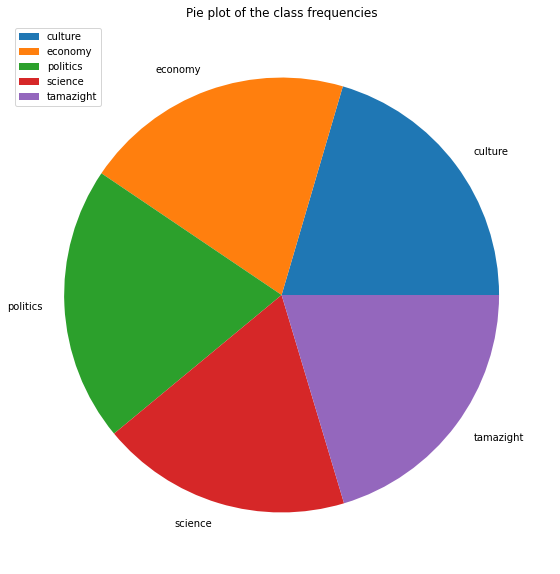

In [5]:
unique, counts = np.unique(y, return_counts=True)
plt.figure("classe Pie", figsize=(10, 10))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=labels)
plt.legend(unique)
plt.show()

In [6]:
#display dataframe
data_set =pd.DataFrame({"content":x,"category":y}) 
display(data_set.shape,data_set.head(10))

(3295, 2)

,content,category
0,"مهرجان ""فيكام"" بمكناس يسعى إلى خلق سوق مغربية ...",culture
1,ملتقى تشكيلي يروج للثقافة الصحراوية \r\n\r\n س...,culture
2,رحيل الشاعر العراقي حسب الشيخ جعفر عن 80 عاما ...,culture
3,"""الصديق المحتاج"".. واتساب تكشف طريقة جديدة لخد...",science
4,لحماية القصر.. غوغل تسمح للأهل بإزالة صور أبنا...,science
5,حولت أحلام العديد من المبتكرين لواقع.. تأثير أ...,science
6,"لوسيد تتغلب على تسلا بشكل رسمي في مجال ""المدى""...",science
7,نشطاء يعوّلون على الانتخابات المقبلة لتسريع ال...,tamazight
8,مقتل 31 شخصا في تدافع قرب إحدى الكنائس جنوبي ن...,politics
9,بنكيران يضع أخطاء الحركة الإسلامية تحت المجهر....,politics


In [7]:
data_set.sample(5, random_state = 0)

,content,category
983,جديد مجلة الصحافة: ريادة الأعمال في الصحافة.. ...,culture
33,"""أنونيموس"" تنشر مقاطع فيديو لاختراقها قنوات رو...",science
2047,"بوشطارت: ""علم المقرئ"" بضاعة بائرة في سوس \r\n\...",tamazight
2427,مُرَكب الجرف الأصفر .. أكبر منصة مندمجة لإنتاج...,economy
578,"العلمي وميارة يفتتحان منتدى ""فوبريل"" \r\n\r\n ...",politics


(5, 2)

,category,content
0,culture,674
1,economy,662
2,politics,674
3,science,614
4,tamazight,671


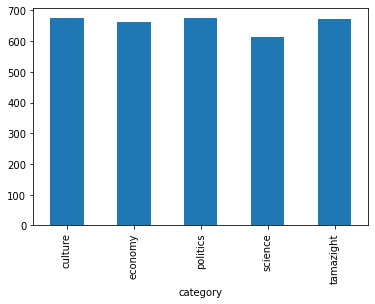

In [8]:
data_set_category = data_set.groupby("category").count()
data_set_category = data_set_category.reset_index()
data_set_category = data_set_category.rename(columns={"id":"number_of_categories"})
display(data_set_category.shape,data_set_category)

display(data_set.groupby("category").category.count().plot.bar(ylim = 0))

In [9]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# create train dataframe
train_set = pd.DataFrame(X_train, columns = ["content"])
train_set["category"] = pd.DataFrame(y_train, columns = ["category"])

# create test dataframe
test_set = pd.DataFrame(X_test, columns = ["content"])
test_set["category"] = pd.DataFrame(y_test, columns = ["category"])

train_set_category = train_set.groupby("category").count()
train_set_category = train_set_category.reset_index()
train_set_category = train_set_category.rename(columns={"id":"number_of_categories"})
display(train_set_category.shape, test_set.head(5))

test_set_category = test_set.groupby("category").count()
test_set_category = test_set_category.reset_index()
test_set_category = test_set_category.rename(columns={"id":"number_of_categories"})
display(test_set_category.shape, test_set.head(5))

(5, 2)

,content,category
0,جديد مجلة الصحافة: ريادة الأعمال في الصحافة.. ...,culture
1,"""أنونيموس"" تنشر مقاطع فيديو لاختراقها قنوات رو...",science
2,"بوشطارت: ""علم المقرئ"" بضاعة بائرة في سوس \r\n\...",tamazight
3,مُرَكب الجرف الأصفر .. أكبر منصة مندمجة لإنتاج...,economy
4,"العلمي وميارة يفتتحان منتدى ""فوبريل"" \r\n\r\n ...",politics


(5, 2)

,content,category
0,جديد مجلة الصحافة: ريادة الأعمال في الصحافة.. ...,culture
1,"""أنونيموس"" تنشر مقاطع فيديو لاختراقها قنوات رو...",science
2,"بوشطارت: ""علم المقرئ"" بضاعة بائرة في سوس \r\n\...",tamazight
3,مُرَكب الجرف الأصفر .. أكبر منصة مندمجة لإنتاج...,economy
4,"العلمي وميارة يفتتحان منتدى ""فوبريل"" \r\n\r\n ...",politics


(5, 2)

,category,content
0,culture,550
1,economy,517
2,politics,538
3,science,499
4,tamazight,532


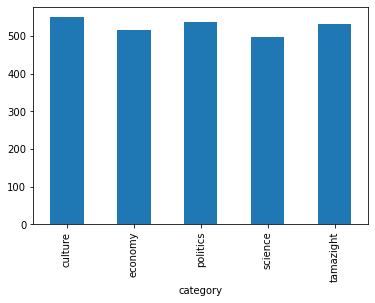

In [11]:
train_set_category = train_set.groupby("category").count()
train_set_category = train_set_category.reset_index()
train_set_category = train_set_category.rename(columns={"id":"number_of_categories"})
display(train_set_category.shape,train_set_category)

display(train_set.groupby("category").category.count().plot.bar(ylim=0))

(5, 2)

,category,content
0,culture,124
1,economy,145
2,politics,136
3,science,115
4,tamazight,139


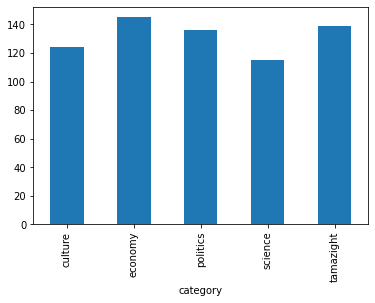

In [12]:
test_set_category = test_set.groupby("category").count()
test_set_category = test_set_category.reset_index()
test_set_category = test_set_category.rename(columns={"id":"number_of_categories"})
display(test_set_category.shape,test_set_category)

display(test_set.groupby("category").category.count().plot.bar(ylim = 0))

## Text Preprocessing
###  1- Cleaning symboles & Stopwords

In [13]:
ar_stop_list = open("arabic_stopwords.txt", encoding="utf-8")
stop_words = ar_stop_list.read().split('\n')
stop_words = [word for word in stop_words if not word=='']
stop_words = set(stop_words)
stop_words

{'لأنكم',
 'لقد',
 'المباراة',
 'فبذلك',
 'حولكم',
 'فكلهن',
 'النار',
 'وهي',
 'أولاء',
 'له',
 'بحيث',
 'كالذين',
 'معظم',
 'رغما',
 'فبالقول',
 'إلى',
 'السبت',
 'فبالغير',
 'اطلاق',
 'الاول',
 'معاً',
 'باللتان',
 'مع',
 'لسن',
 'كأنكم',
 'بدوننا',
 'ضدهم',
 'الغير',
 'الف',
 'مثل',
 'عشر',
 'فإليهم',
 'فاللذان',
 'فكأنهم',
 'أمامي',
 'فعندما',
 'بينهن',
 'لأمام',
 'فعدا',
 'فمنه',
 'المرحلة',
 'خلفكن',
 'ينا',
 'فنحن',
 'عبد',
 'بينكما',
 'ببعض',
 'للامم',
 'ثلاثة',
 'فمننا',
 'إطلاقاً',
 'فمنهم',
 'الاراضي',
 'إنك',
 'حولكن',
 'فبك',
 'فلها',
 'مهما',
 'تكونوا',
 'فأقل',
 'دونهم',
 'فإنكم',
 'ضدهما',
 'بانه',
 'بان',
 'عندكم',
 'هذه',
 'عليهم',
 'فألا',
 'التى',
 'عندك',
 'قمة',
 'فحينئذ',
 'عليكن',
 'أيضا',
 'بذي',
 'وكالة',
 'ففوقك',
 'ذاتهما',
 'لأنهم',
 'باللاتي',
 'فبعدة',
 'خصيصا',
 'انا',
 'بذلك',
 'لأمامك',
 'بأياً',
 'لابد',
 'الاولى',
 'فبكما',
 'فلهم',
 'عدد',
 'فجأةًً',
 'الخميس',
 'دائماً',
 'أم',
 'لللاتي',
 'ممكن',
 'فهذي',
 'منهم',
 'فباولئك',
 'بإذا',
 'كافة',
 '

In [14]:
import qalsadi.lemmatizer
from nltk.stem.isri import ISRIStemmer
from nltk import word_tokenize
import qalsadi.lemmatizer


arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟،.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)
def remove_diacritics(text):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', str(text))
    return text
def remove_stopwords(text):
#     stop_words = set(stopwords.words('arabic'))
    ar_stop_list = open("arabic_stopwords.txt", encoding="utf-8")
    stop_words = ar_stop_list.read().split('\n')
    stop_words = set([word for word in stop_words if not word==''])
    stop_words.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه','حول','أضاف','و قد','و في','وفي','ذلك', 'بأن','سيكون','عام','وذلك'})
    words = word_tokenize(text)
    return  " ".join([i for i in words if i not in stop_words ])
def remove_stopwords_token(text):
#     stop_words = set(stopwords.words('arabic'))
    ar_stop_list = open("arabic_stopwords.txt", encoding="utf-8")
    stop_words = ar_stop_list.read().split('\n')
    stop_words = set([word for word in stop_words if not word==''])
    stop_words.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه','حول','أضاف','و قد','و في','وفي','ذلك', 'بأن','سيكون','عام','وذلك'})
    words = word_tokenize(text)
    return  [i for i in words if i not in stop_words ]

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)



### Lemmatization and Stemming

In [15]:
def stem_word(text):
    st = ISRIStemmer()
    return " ".join([st.stem(word) for word in text])

def lemmatize_(text):
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    lemmas = lemmer.lemmatize_text(text)
    return (lemmas)

def lemmatize_farasa(text):
    url = 'https://farasa.qcri.org/webapi/lemmatization/'
#     text = 'يُشار إلى أن اللغة العربية' 
    api_key = "sVLpCOuQAvmkEMOlEU"
    payload = {'text': text, 'api_key': api_key}
    data = requests.post(url, data=payload)
    result = json.loads(data.text)
    print(result['text'])
    return result['text']

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = "".join([word for word in text if word.isdigit()==False])
    text = remove_emoji(text)
    text = remove_tags(text)
    text = remove_stopwords(text)
    text = remove_diacritics(text)
    tokens = word_tokenize(text)
    text = stem_word(text)
#     text = lemmatize_farasa(text)
    text = ' '.join([word for word in tokens])
    return text
def clean_token_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = "".join([word for word in text if word.isdigit()==False])
    text = remove_emoji(text)
    text = remove_tags(text)
    text = remove_stopwords_token(text)
    text = remove_diacritics(text)
    tokens = word_tokenize(text)
    text = stem_word(text)
#     text = lemmatize_farasa(text)
    text = ' '.join([word for word in tokens])
    return text

In [16]:
data_set['cleaned_content'] = data_set['content'].apply(clean_text)
data_set['cleaned_content_list'] = data_set['content'].apply(clean_token_text)
display(data_set.head(10))

,content,category,cleaned_content,cleaned_content_list
0,"مهرجان ""فيكام"" بمكناس يسعى إلى خلق سوق مغربية ...",culture,مهرجان فيكام بمكناس يسعى خلق سوق مغربية لفيلم ...,"[ 'مهرجان ' , 'فيكام ' , 'بمكناس ' , 'يسعى ' ,..."
1,ملتقى تشكيلي يروج للثقافة الصحراوية \r\n\r\n س...,culture,ملتقى تشكيلي يروج للثقافة الصحراوية ستنطلق بمد...,"[ 'ملتقى ' , 'تشكيلي ' , 'يروج ' , 'للثقافة ' ..."
2,رحيل الشاعر العراقي حسب الشيخ جعفر عن 80 عاما ...,culture,رحيل الشاعر العراقي الشيخ جعفر توفي أمس الشاعر...,"[ 'رحيل ' , 'الشاعر ' , 'العراقي ' , 'الشيخ ' ..."
3,"""الصديق المحتاج"".. واتساب تكشف طريقة جديدة لخد...",science,الصديق المحتاج واتساب تكشف طريقة جديدة لخداع ا...,"[ 'الصديق ' , 'المحتاج ' , 'واتساب ' , 'تكشف '..."
4,لحماية القصر.. غوغل تسمح للأهل بإزالة صور أبنا...,science,لحماية القصر غوغل تسمح للأهل بإزالة صور أبنائه...,"[ 'لحماية ' , 'القصر ' , 'غوغل ' , 'تسمح ' , '..."
5,حولت أحلام العديد من المبتكرين لواقع.. تأثير أ...,science,حولت أحلام العديد المبتكرين لواقع تأثير أفلام ...,"[ 'حولت ' , 'أحلام ' , 'العديد ' , 'المبتكرين ..."
6,"لوسيد تتغلب على تسلا بشكل رسمي في مجال ""المدى""...",science,لوسيد تتغلب تسلا رسمي مجال المدى للمسافات الطو...,"[ 'لوسيد ' , 'تتغلب ' , 'تسلا ' , 'رسمي ' , 'م..."
7,نشطاء يعوّلون على الانتخابات المقبلة لتسريع ال...,tamazight,نشطاء يعولون الانتخابات المقبلة لتسريع الطابع ...,"[ 'نشطاء ' , 'يعولون ' , 'الانتخابات ' , 'المق..."
8,مقتل 31 شخصا في تدافع قرب إحدى الكنائس جنوبي ن...,politics,مقتل تدافع قرب الكنائس جنوبي نيجيريا قتل الأقل...,"[ 'مقتل ' , 'تدافع ' , 'قرب ' , 'الكنائس ' , '..."
9,بنكيران يضع أخطاء الحركة الإسلامية تحت المجهر....,politics,بنكيران يضع أخطاء الحركة الإسلامية تحت المجهر ...,"[ 'بنكيران ' , 'يضع ' , 'أخطاء ' , 'الحركة ' ,..."


Politics related words:


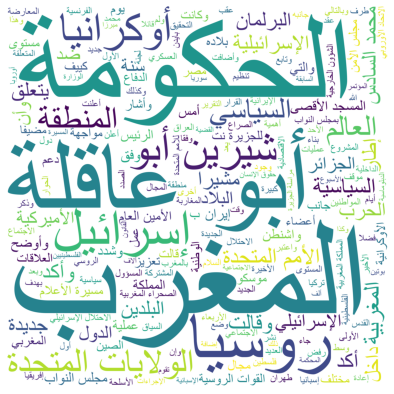

Culture related words:


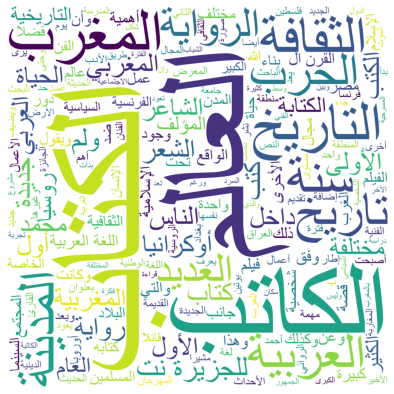

Tamazight related words:


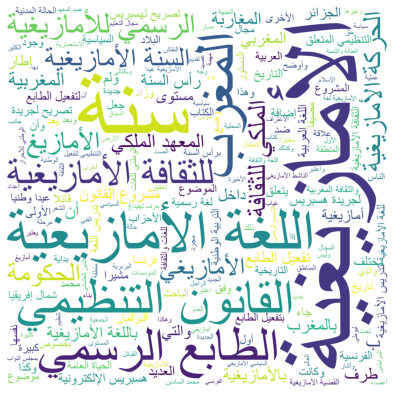

Science related words:


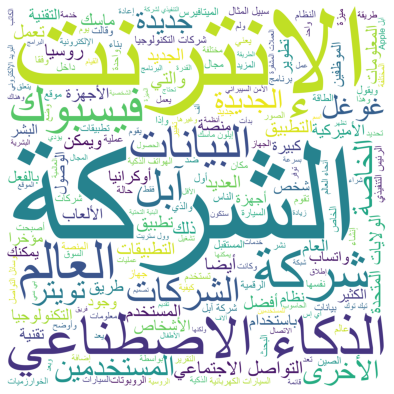

Economy related words:


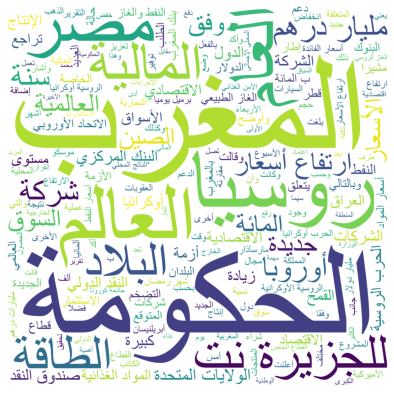

In [17]:
# stop = set(stopwords.words('arabic'))
# stop.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه','حول','أضاف','وفي','ذلك', 'بأن','سيكون','عام','و ذلك'})

ar_stop_list = open("arabic_stopwords.txt", encoding="utf-8")
stop_words = ar_stop_list.read().split('\n')
stop_words = [word for word in stop_words if not word=='']
stop = set(stop_words)
stop.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه','حول','وأضاف','أضاف','و قد','و في','وفي','ذلك', 'بأن','سيكون','عام','وذلك'})


Politics = data_set[data_set['category'] == 'politics']

Politics = Politics['cleaned_content']

Culture = data_set[data_set['category'] == 'culture']

Culture = Culture['cleaned_content']

Tamazight = data_set[data_set['category'] == 'tamazight']

Tamazight = Tamazight['cleaned_content']

Science = data_set[data_set['category'] == 'science']

Science = Science['cleaned_content']

Economy = data_set[data_set['category'] =='economy']

Economy = Economy['cleaned_content']


def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split() ])
    reshaped_text = arabic_reshaper.reshape(cleaned_word)
    cleaned_word = get_display(reshaped_text)
    wordcloud = WordCloud(font_path='arial',stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("Politics related words:")
wordcloud_draw(Politics, 'white')

print("Culture related words:")
wordcloud_draw(Culture, 'white')

print("Tamazight related words:")
wordcloud_draw(Tamazight, 'white')

print("Science related words:")
wordcloud_draw(Science, 'white')

print("Economy related words:")
wordcloud_draw(Economy, 'white')

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

"""
bag_of_words_calculate: caclulates bag of words for train
                        and test dataframe column
                        
arguments:
    train_df: pandas dataframe
    test_df:  pandas dataframe
    column:   string
"""
def bag_of_words_calculate(train_df, test_df, column):
    count_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=300)
    train_X_bow = count_vectorizer.fit_transform(train_df[column])
    test_X_bow = count_vectorizer.transform(test_df[column])
    return train_X_bow, test_X_bow

"""
bag_of_words_calculate_store: caclulates bag of words for train and test dataframe
                              column and stores them as a new column
                        
arguments:
    train_df: pandas dataframe
    test_df:  pandas dataframe
    column:   string
"""
def bag_of_words_calculate_store(train_df, test_df, column):
    train_X_bow,test_X_bow = bag_of_words_calculate(train_df, test_df, column)
    
    vectors = list()
    for v in train_X_bow.toarray():
        vectors.append(v)

    # save tf-idfs as a new column in the train dataframe
    train_df[f"bow_{column}"] = pd.Series(vectors,index=train_df.index)
    
    vectors = list()
    for v in test_X_bow.toarray():
        vectors.append(v)

    # save tf-idfs as a new column in the test dataframe
    test_df[f"bow_{column}"] = pd.Series(vectors,index=test_df.index)
    

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

"""
tf_idf_calculate: caclulates tf-idfs for train and test dataframe column
                        
arguments:
    train_df: pandas dataframe
    test_df:  pandas dataframe
    column:   string
"""
def tf_idf_calculate(train_df, test_df, column):
    tf_idf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=300)
    train_X_tf_idf = tf_idf_vectorizer.fit_transform(train_df[column])
    test_X_tf_idf = tf_idf_vectorizer.transform(test_df[column])
    return train_X_tf_idf, test_X_tf_idf

"""
tf_idf_calculate: caclulates tf-idfs for train and test dataframe column 
                  and stores them as a new column
arguments:
    train_df: pandas dataframe
    test_df:  pandas dataframe
    column:   string
"""
def tf_idf_calculate_store(train_df, test_df, column):
    train_X_tf_idf, test_X_tf_idf = tf_idf_calculate(train_df, test_df, column)

    vectors = list()
    for v in train_X_tf_idf.toarray():
        vectors.append(v)
    # save tf-idfs as a new column in the train dataframe
    train_df[f"tf_idf_{column}"] = pd.Series(vectors, index = train_df.index)
    
    vectors = list()
    for v in test_X_tf_idf.toarray():
        vectors.append(v)
    # save tf-idfs as a new column in the test dataframe
    test_df[f"tf_idf_{column}"] = pd.Series(vectors, index = test_df.index)

In [20]:

from gensim.models import Word2Vec

"""
word2vec_train: creates and trains a word2vec model for a dataframe column.
                also, it can save the model

arguments:
    dataframe: pandas dataframe
    column:    string
"""
def word2vec_create_train(dataframe, column, word2vec_model_file = None):
    word2vec_model = Word2Vec(dataframe[column], vector_size = 300, window = 5,
                              min_count = 100, sg = 1, hs = 0, negative = 10)
    word2vec_model.train(dataframe[column],total_examples=len(dataframe[column]),epochs=20)
    if word2vec_model_file is not None:
        word2vec_model.save(word2vec_model_file)
    return word2vec_model

"""
word2vec_sentence_vectorizer: calculates the average of all word embeddings for 
                              each sentence and and stores them as a new column

arguments:
    dataframe: pandas dataframe
    column:    string
"""
def word2vec_sentence_vectorizer(dataframe, column, word2vec_model, store = False):
    sentences = dataframe[column].tolist()
    vectors = list()
    # for each sentence we sum all word embedding of each word
    # and we divide by the number of all words in the sentence.
    for sentence in sentences:
#         print(sentence)
#         sentence = sentence.split(" ")
        sentence_vector = list()
        number_of_words = 0
        for word in sentence:
            try:
                if number_of_words == 0:
#                     print(word)
                    sentence_vector = word2vec_model[word]
#                     print(sentence_vector)
                else:
                    print(word)
                    sentence_vector = np.add(sentence_vector, word2vec_model[word])
#                     print(sentence_vector)
                number_of_words += 1
            except:
                pass
        sentence_vector_array = np.asarray(sentence_vector) / number_of_words
        vectors.append(sentence_vector_array)
#         print(vectors)
        
    # save word2vecs as a new column in the dataframe
    if store is True:
        dataframe[f"word2vec_{column}"] = pd.Series(vectors, index = test_df.index)
        
    return vectors

In [21]:
data_set['categoryId'] = data_set['category'].factorize()[0]

In [22]:
# test_set = test_set.drop(columns=['category_y'])

In [23]:
train_set = pd.merge(train_set, data_set,on=["content","category"])
test_set = pd.merge(test_set, data_set,on=["content"])
display(train_set.shape,train_set.head(3))
display(test_set.shape,test_set.head(3))

(2729, 5)

,content,category,cleaned_content,cleaned_content_list,categoryId
0,"""الدفع بعدم الدستورية"" يثير تساؤلات برلمانية و...",politics,الدفع الدستورية يثير تساؤلات برلمانية ومخاوف ح...,"[ 'الدفع ' , 'الدستورية ' , 'يثير ' , 'تساؤلات...",3
1,بعد ارتفاع أسعارها لمستويات قياسية.. أردنيون ي...,economy,ارتفاع أسعارها لمستويات قياسية أردنيون يدشنون ...,"[ 'ارتفاع ' , 'أسعارها ' , 'لمستويات ' , 'قياس...",4
2,"الكاتب البرازيلي كويلو .. لماذا تحول ""الخيميائ...",culture,الكاتب البرازيلي كويلو تحول الخيميائي ظاهرة أد...,"[ 'الكاتب ' , 'البرازيلي ' , 'كويلو ' , 'تحول ...",0


(692, 6)

,content,category_x,category_y,cleaned_content,cleaned_content_list,categoryId
0,جديد مجلة الصحافة: ريادة الأعمال في الصحافة.. ...,culture,culture,جديد مجلة الصحافة ريادة الأعمال الصحافة وقائع ...,"[ 'جديد ' , 'مجلة ' , 'الصحافة ' , 'ريادة ' , ...",0
1,"""أنونيموس"" تنشر مقاطع فيديو لاختراقها قنوات رو...",science,science,أنونيموس تنشر مقاطع فيديو لاختراقها قنوات روسي...,"[ 'أنونيموس ' , 'تنشر ' , 'مقاطع ' , 'فيديو ' ...",1
2,"بوشطارت: ""علم المقرئ"" بضاعة بائرة في سوس \r\n\...",tamazight,tamazight,بوشطارت علم المقرئ بضاعة بائرة سوس بكثير الامت...,"[ 'بوشطارت ' , 'علم ' , 'المقرئ ' , 'بضاعة ' ,...",2


In [24]:
import warnings
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def most_common(list_):
    data = Counter(list_)
    return data.most_common(1)[0][0]



In [25]:
def spectral_bow_tfidf(dataframe, column, label_column, vectorizer_name, visualizer, directory = None):
    number_of_clusters = 5
    documents_text = dataframe[column].tolist()
    
    if vectorizer_name == "bow":
        vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
        categories = ["culture","politics","tamazight","science","economy"]
        colors     = ["pink","yellow","red","blue","green"]
        markers    = ["x","+","*","*","x"]
    elif vectorizer_name == "tf_idf":
        vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
        categories = ["culture","politics","tamazight","science","economy"]
        colors     = ["pink","yellow","red","blue","green"]
        markers    = ["x","+","x","*","*"]
    #######################################################################################
    
#     if vectorizer_name is "bow":
#         vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3),stop_words=stop)
#         categories = ["culture","politics","economy"]
#         colors     = ["blue","green","yellow"]
#         markers    = ["x","+","x"]
#     elif vectorizer_name is "tf_idf":
#         vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
#         categories = ["culture","politics","economy"]
#         colors     = ["blue","green","pink"]
#         markers    = ["x","+","*"]

    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()
    
    # plot next to each other
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))

    spectral_clusterer = SpectralClustering(n_clusters = number_of_clusters, random_state= 0, assign_labels='discretize',
                                            n_neighbors=10)  
    spectral_clusterer.fit(matrix)
    
    all_words = list()
    for sentence in documents_text:
        words = word_tokenize(sentence)
        all_words.extend(words)
    vocabulary_dataframe = pd.DataFrame({"words": all_words}, index = all_words)
    

    if visualizer == "pca":
        pca = PCA(n_components = 2).fit(matrix.todense())
        coordinates = pca.transform(matrix.todense())
    elif visualizer == "svd":
        svd = TruncatedSVD(n_components = 2).fit(matrix.todense())
        coordinates = svd.transform(matrix.todense())
    elif visualizer == "ica":
        ica = FastICA(n_components = 2).fit(matrix.todense())
        coordinates = ica.transform(matrix.todense())

    clusters = spectral_clusterer.labels_.tolist()

    # plot spectral news clusters
    for i in range(0, coordinates.shape[0]):
        if clusters[i] == 0:
            c0 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[0],marker=markers[0])
        elif clusters[i] == 1:
            c1 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[1],marker=markers[1])
        elif clusters[i] == 2:
            c2 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[2],marker=markers[2])
        elif clusters[i] == 3:
            c3 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[3],marker=markers[3])
        elif clusters[i] == 4:
            c4 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[4],marker=markers[4])
    axes[0].legend([c0,c1,c2,c3,c4],[categories[0],categories[1],categories[2],categories[3],categories[4]])
######################################################################################################################
#     axes[0].legend([c0,c1,c2],[categories[0],categories[1],categories[2]])
    
    axes[0].set_title(f"{vectorizer_name}: {column}: Spectral News Clusters")

    # reset variables for plotting true clusters
    clusters = dataframe[label_column].values
    categories = ["culture","politics","tamazight","science","economy"]
    colors     = ["pink","yellow","red","blue","green"]
    markers    = ["+","*","*","x","x"]
    ######################################################
#     categories = ["culture","politics","economy"]
#     colors     = ["green","pink","blue"]
#     markers    = ["+","*","x"]
    
    # PLOT NEWS TRUE CLUSTERS
    # plot news true clusters
    for i in range(0, coordinates.shape[0]):
        if clusters[i] == 0:
            c0 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[0],marker=markers[0])
        elif clusters[i] == 1:
            c1 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[1],marker=markers[1])
        elif clusters[i] == 2:
            c2 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[2],marker=markers[2])
        elif clusters[i] == 3:
            c3 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[3],marker=markers[3])
        elif clusters[i] == 4:
            c4 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[4],marker=markers[4])
    axes[1].legend([c0,c1,c2,c3,c4],[categories[0],categories[1],categories[2],categories[3],categories[4]])
####################################################################################################################
#     axes[1].legend([c0,c1,c2],[categories[0],categories[1],categories[2]])
    
    axes[1].set_title(f"{vectorizer_name}: {column}: News True Clusters")
    
# ======================================================================================
# Clustering Evaluation ======  Silhouette   & Davies Bouldinn =========================
    '''fig_, axes_ = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
    
    l_s=[0,0]
    l_db = [0,0]
    for n in range(2,7):
        result = spectral_clusterer.labels_
        l_s.append(davies_bouldin_score(matrix.toarray() , result)) 
        l_db.append(silhouette_score(matrix.toarray() , result)) 

    axes_[0].plot(l_s, color='magenta', marker='o',mfc='blue' )
    axes_[1].plot(l_db, color='magenta', marker='o',mfc='blue' )

    axes_[0].set_title('Davies_bouldin indice')
    axes_[1].set_title('silhouette indice')
    
    axes_[0].set_ylabel('valeur de lindice de davies_bouldin')
    axes_[1].set_ylabel('valeur de lindice de silhouette') '''
    
    

In [26]:
def kmeans_bow_tfidf(dataframe, column, label_column, vectorizer_name, visualizer, directory = None):
    number_of_clusters = 5
    documents_text = dataframe[column].tolist()
    
    if vectorizer_name == "bow":
        vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
        categories = ["culture","politics","tamazight","science","economy"]
        colors     = ["pink","yellow","red","blue","green"]
        markers    = ["x","+","*","*","x"]
    elif vectorizer_name == "tf_idf":
        vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
        categories = ["culture","politics","tamazight","science","economy"]
        colors     = ["pink","yellow","red","blue","green"]
        markers    = ["x","+","x","*","*"]
    #######################################################################################
    
#     if vectorizer_name is "bow":
#         vectorizer = CountVectorizer(min_df=3,ngram_range=(1,3),stop_words=stop)
#         categories = ["culture","politics","economy"]
#         colors     = ["blue","green","yellow"]
#         markers    = ["x","+","x"]
#     elif vectorizer_name is "tf_idf":
#         vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
#         categories = ["culture","politics","economy"]
#         colors     = ["blue","green","pink"]
#         markers    = ["x","+","*"]

    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()
    
    # plot next to each other
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))

    k_means_clusterer = KMeans(n_clusters = number_of_clusters, init = "k-means++",
                               max_iter = 100, random_state = 0)  
    k_means_clusterer.fit(matrix)
    
    all_words = list()
    for sentence in documents_text:
        words = word_tokenize(sentence)
        all_words.extend(words)
    vocabulary_dataframe = pd.DataFrame({"words": all_words}, index = all_words)
    
    # sort cluster centers by proximity to centroid
    order_centroids = k_means_clusterer.cluster_centers_.argsort()[:, ::-1] 
    
    # calculate top words
    top_words = list()
    for i in range(number_of_clusters):
        display(f"{vectorizer_name}: Top 3 words for cluster {i}")
        for ind in order_centroids[i,:3]:
            word = vocabulary_dataframe.loc[terms[ind].split(" ")].values.tolist()[0][0]
            display(f"{word}")
        index = order_centroids[i,0]
        word = vocabulary_dataframe.loc[terms[index].split(" ")].values.tolist()[0][0]
        top_words.append(word)
    display(f"{vectorizer_name}: top word of each cluster:",top_words)
    
    # calculate indexes
    index_list = list()
    for top_word in top_words:
        indexes = [index for index, sentence in enumerate(documents_text) if top_word in sentence]
        index_list.append(most_common(k_means_clusterer.labels_[indexes]))

    if visualizer == "pca":
        pca = PCA(n_components = 2).fit(matrix.todense())
        coordinates = pca.transform(matrix.todense())
    elif visualizer == "svd":
        svd = TruncatedSVD(n_components = 2).fit(matrix.todense())
        coordinates = svd.transform(matrix.todense())
    elif visualizer == "ica":
        ica = FastICA(n_components = 2).fit(matrix.todense())
        coordinates = ica.transform(matrix.todense())

    clusters = k_means_clusterer.labels_.tolist()

    # plot k-means news clusters
    for i in range(0, coordinates.shape[0]):
        if clusters[i] == 0:
            c0 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[0],marker=markers[0])
        elif clusters[i] == 1:
            c1 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[1],marker=markers[1])
        elif clusters[i] == 2:
            c2 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[2],marker=markers[2])
        elif clusters[i] == 3:
            c3 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[3],marker=markers[3])
        elif clusters[i] == 4:
            c4 = axes[0].scatter(coordinates[i,0],coordinates[i,1],c=colors[4],marker=markers[4])
    axes[0].legend([c0,c1,c2,c3,c4],[categories[0],categories[1],categories[2],categories[3],categories[4]])
######################################################################################################################
#     axes[0].legend([c0,c1,c2],[categories[0],categories[1],categories[2]])
    
    axes[0].set_title(f"{vectorizer_name}: {column}: K-means News Clusters")

    # reset variables for plotting true clusters
    clusters = dataframe[label_column].values
    categories = ["culture","politics","tamazight","science","economy"]
    colors     = ["pink","yellow","red","blue","green"]
    markers    = ["+","*","*","x","x"]
    ######################################################
#     categories = ["culture","politics","economy"]
#     colors     = ["green","pink","blue"]
#     markers    = ["+","*","x"]
    
    # PLOT NEWS TRUE CLUSTERS
    # plot news true clusters
    for i in range(0, coordinates.shape[0]):
        if clusters[i] == 0:
            c0 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[0],marker=markers[0])
        elif clusters[i] == 1:
            c1 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[1],marker=markers[1])
        elif clusters[i] == 2:
            c2 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[2],marker=markers[2])
        elif clusters[i] == 3:
            c3 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[3],marker=markers[3])
        elif clusters[i] == 4:
            c4 = axes[1].scatter(coordinates[i,0],coordinates[i,1],c=colors[4],marker=markers[4])
    axes[1].legend([c0,c1,c2,c3,c4],[categories[0],categories[1],categories[2],categories[3],categories[4]])
####################################################################################################################
#     axes[1].legend([c0,c1,c2],[categories[0],categories[1],categories[2]])
    
    axes[1].set_title(f"{vectorizer_name}: {column}: News True Clusters")
    
    
    
# ======================================================================================
# Clustering Evaluation ======  Silhouette   & Davies Bouldinn =========================
    '''fig_, axes_ = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))
    
    l_s=[0,0]
    l_db = [0,0]
    for n in range(2,7):
        result = k_means_clusterer.labels_
        l_s.append(davies_bouldin_score(matrix.toarray() , result)) 
        l_db.append(silhouette_score(matrix.toarray() , result)) 

    axes_[0].plot(l_s, color='magenta', marker='o',mfc='blue' )
    axes_[1].plot(l_db, color='magenta', marker='o',mfc='blue' )

    axes_[0].set_title('Davies_bouldin indice')
    axes_[1].set_title('silhouette indice')
    
    axes_[0].set_ylabel('valeur de lindice de davies_bouldin')
    axes_[1].set_ylabel('valeur de lindice de silhouette')'''
    
    

#### Spectral Clustering par Analyse en composantes principales (ACP)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


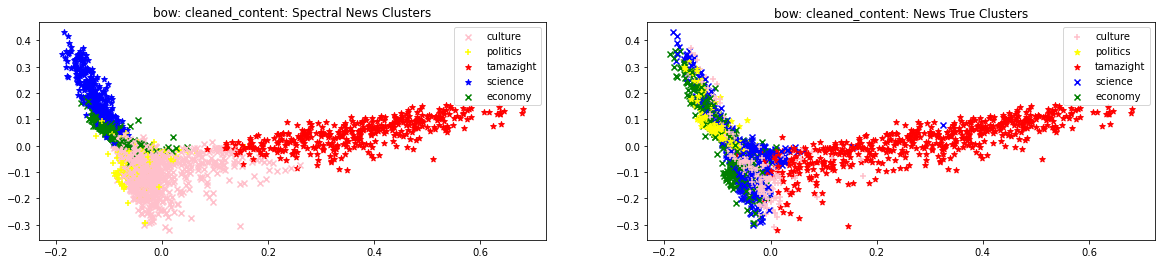

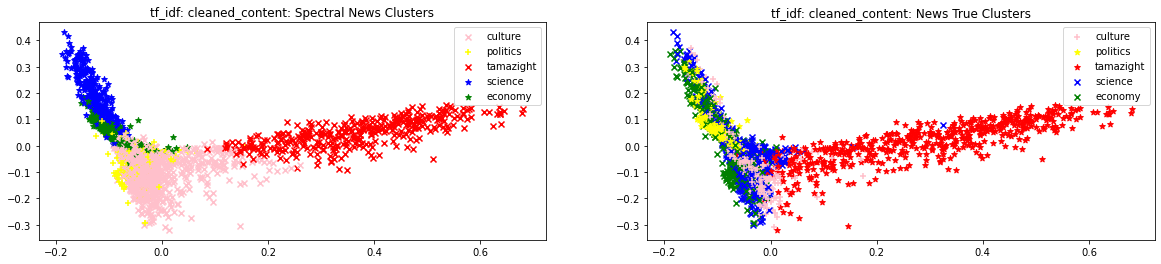

In [27]:
# !pip install pyamg
spectral_bow_tfidf(train_set, "cleaned_content","categoryId", "bow", "pca" )
spectral_bow_tfidf(train_set, "cleaned_content","categoryId", "tf_idf", "pca" )

#### Spectral Clustering par Décomposition en valeurs singulières (DVS)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


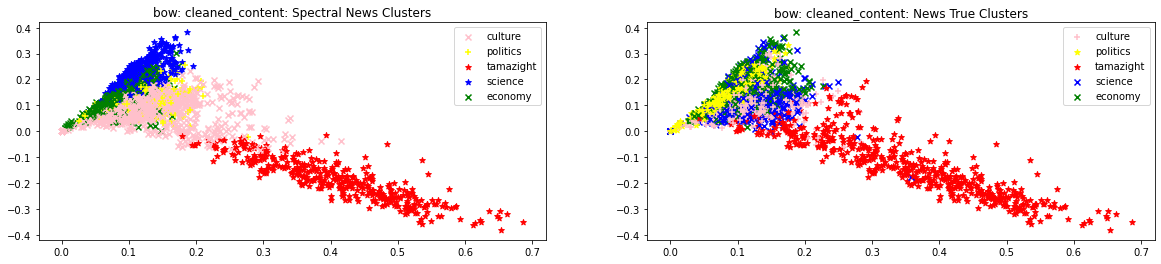

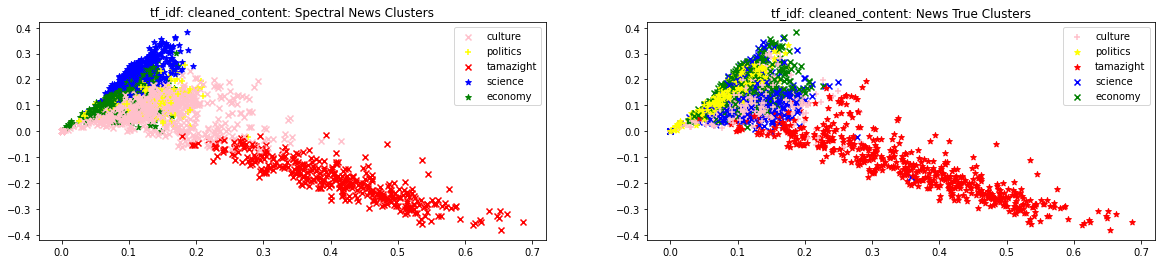

In [28]:
spectral_bow_tfidf(train_set, "cleaned_content","categoryId", "bow", "svd" )
spectral_bow_tfidf(train_set, "cleaned_content","categoryId", "tf_idf", "svd" )

#### K-means Clustering par Analyse en composantes principales (ACP)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'bow: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'bow: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'bow: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'bow: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'bow: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'bow: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'tf_idf: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'tf_idf: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'tf_idf: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'tf_idf: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'tf_idf: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'tf_idf: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

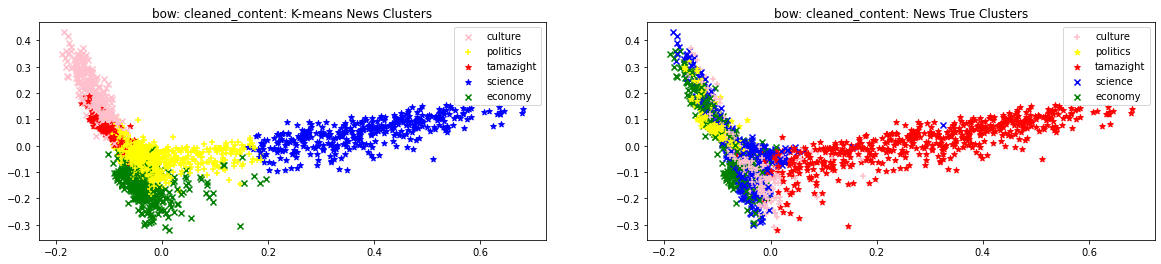

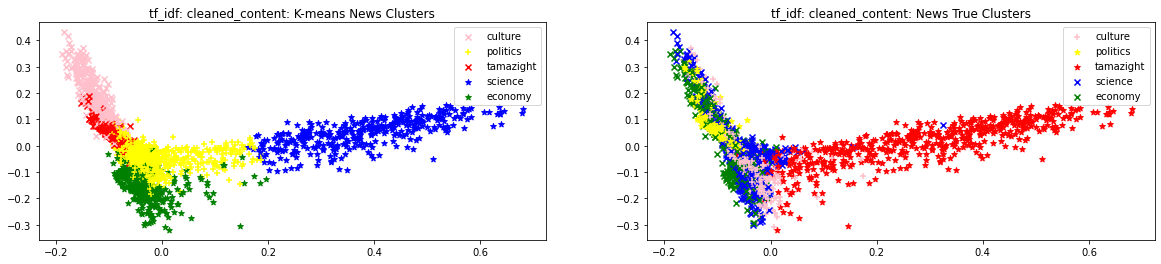

In [29]:
# word2vec_model = word2vec_create_train(train_set,"cleaned_content")
# print(word2vec_model.wv[0])
kmeans_bow_tfidf(train_set, "cleaned_content","categoryId", "bow", "pca" )
kmeans_bow_tfidf(train_set, "cleaned_content","categoryId", "tf_idf", "pca" )
# kmeans_word2vec(train_set, "cleaned_content_list","categoryId", word2vec_model, "pca")

#### K-means Clustering par Décomposition en valeurs singulières (DVS)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'bow: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'bow: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'bow: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'bow: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'bow: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'bow: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'tf_idf: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'tf_idf: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'tf_idf: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'tf_idf: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'tf_idf: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'tf_idf: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

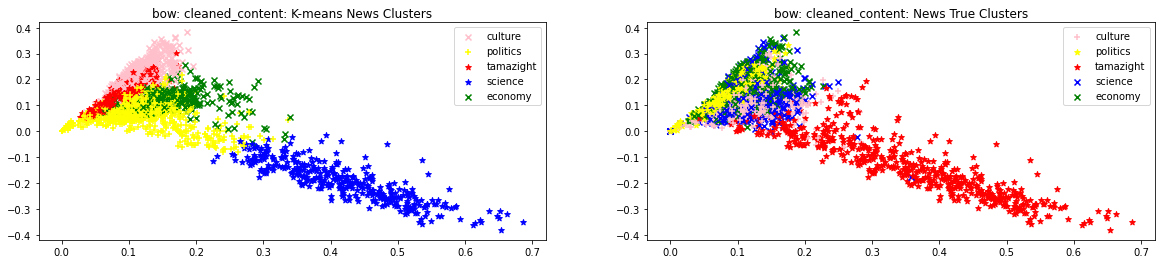

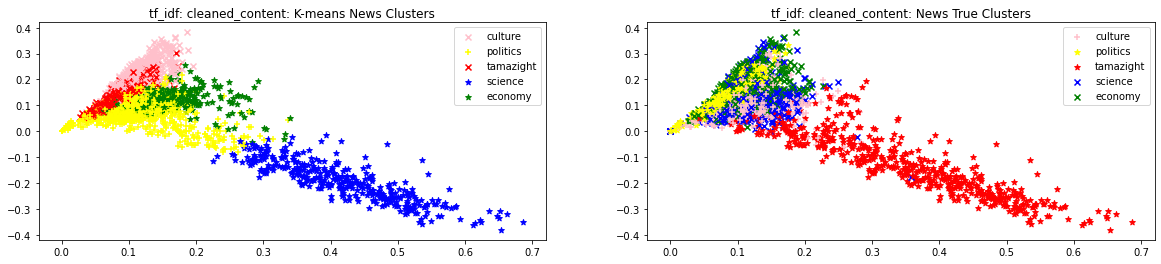

In [30]:
kmeans_bow_tfidf(train_set, "cleaned_content","categoryId", "bow", "svd" )
kmeans_bow_tfidf(train_set, "cleaned_content","categoryId", "tf_idf", "svd" )

#### K-means Clustering par Analyse en Composantes indépendantes (ACI)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'bow: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'bow: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'bow: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'bow: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'bow: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'bow: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


'tf_idf: Top 3 words for cluster 0'

'أوكرانيا'

'روسيا'

'الروسية'

'tf_idf: Top 3 words for cluster 1'

'محمد'

'الحكومة'

'العام'

'tf_idf: Top 3 words for cluster 2'

'شركة'

'الشركة'

'العالم'

'tf_idf: Top 3 words for cluster 3'

'الأمازيغية'

'الأمازيغي'

'اللغة'

'tf_idf: Top 3 words for cluster 4'

'المغرب'

'المغربية'

'المائة'

'tf_idf: top word of each cluster:'

['أوكرانيا', 'محمد', 'شركة', 'الأمازيغية', 'المغرب']

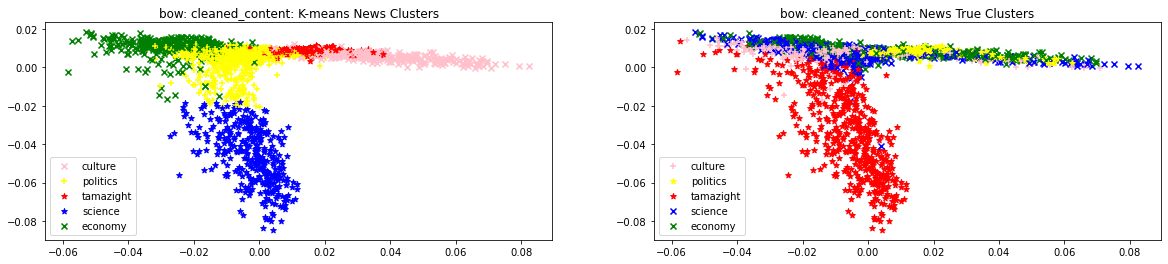

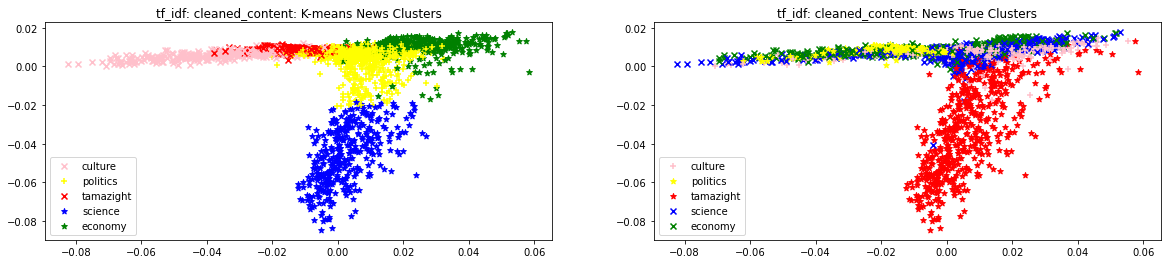

In [31]:
kmeans_bow_tfidf(train_set, "cleaned_content",
                 "categoryId", "bow", "ica" )
kmeans_bow_tfidf(train_set, "cleaned_content",
                 "categoryId", "tf_idf", "ica" )

In [32]:
ar_stop_list = open("arabic_stopwords.txt", encoding="utf-8")
stop_words = ar_stop_list.read().split('\n')
stop_words = [word for word in stop_words if not word=='']
stop = set(stop_words)
stop.update({'خلال', 'أيضا' ,'لهذه' , 'وقد', 'يمكن','قال' ,'أنه','حول','وأضاف','أضاف','و قد','و في','وفي','ذلك', 'بأن','سيكون','عام','وذلك'})


### Evaluation des modéles de Clustering par deux indices : Davies_bouldin et Silhouette

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


2   4.2356755510627435


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


3   7.675412565278182


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


4   6.763239998223363


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


5   7.131602856928881


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


6   6.51223722498223


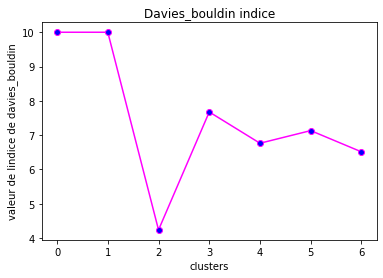

In [33]:
# Kmeans Clustering Evaluation : Davies_bouldin
l=[10,10]
for n in range(2,7):
    documents_text = train_set["cleaned_content"].tolist()
    vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()

    k_means_clusterer = KMeans(n_clusters = n, init = "random",
                           max_iter = 100, random_state = 0)  
    k_means_clusterer.fit(matrix)
    result = k_means_clusterer.labels_
    print(n , ' ' , davies_bouldin_score(matrix.toarray() , result))
    l.append(davies_bouldin_score(matrix.toarray() , result)) 

       
plt.plot(l, color='magenta', marker='o',mfc='blue' )

plt.title('Davies_bouldin indice')
plt.ylabel('valeur de lindice de davies_bouldin')
plt.xlabel('clusters')
plt.show()    

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


2   0.025123359831327016


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


3   0.021035282383387418


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


4   0.02418763072564712


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


5   0.022130776241314345


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


6   0.024588500009070355


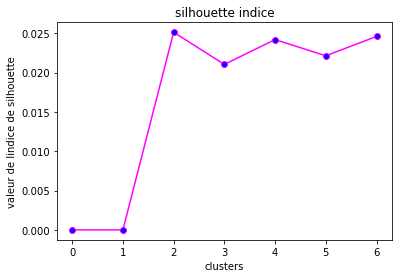

In [34]:
# Kmeans Clustering Evaluation : silhouette
l=[0,0]
for n in range(2,7):
    documents_text = train_set["cleaned_content"].tolist()
    vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()

    k_means_clusterer = KMeans(n_clusters = n, init = "random",
                           max_iter = 100, random_state = 0)  
    k_means_clusterer.fit(matrix)
    result = k_means_clusterer.labels_
    print(n , ' ' , silhouette_score(matrix.toarray() , result))
    l.append(silhouette_score(matrix.toarray() , result)) 

       
plt.plot(l, color='magenta', marker='o',mfc='blue' )
plt.title('silhouette indice')
plt.ylabel('valeur de lindice de silhouette')
plt.xlabel('clusters')
plt.show() 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


2   0.025417590790442146


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


3   0.022798464129730026


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


4   0.022512133424590873


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


5   0.021995250872728515


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


6   0.019531993996035644


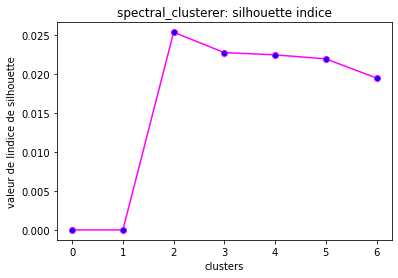

In [35]:
# Spectral Clustering Evaluation : silhouette
l=[0,0]
for n in range(2,7):
    documents_text = train_set["cleaned_content"].tolist()
    vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()

    spectral_clusterer = SpectralClustering(n_clusters = n, random_state= 0, assign_labels='discretize')  
    spectral_clusterer.fit(matrix)
    result = spectral_clusterer.labels_
    print(n , ' ' , silhouette_score(matrix.toarray() , result))
    l.append(silhouette_score(matrix.toarray() , result)) 

       
plt.plot(l, color='magenta', marker='o',mfc='blue' )
plt.title('spectral_clusterer: silhouette indice')
plt.ylabel('valeur de lindice de silhouette')
plt.xlabel('clusters')
plt.show() 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


2   4.643972216941112


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


3   7.022998665106791


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


4   7.619693287665524


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


5   7.1011920530278845


C:\Users\dell\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ممكنا'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


6   6.847320579943869


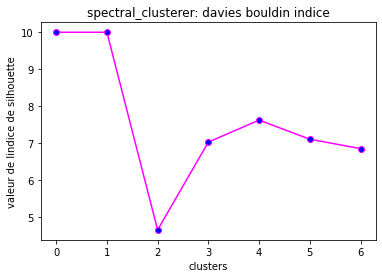

In [36]:
# Spectral Clustering Evaluation : davies_bouldin_score
l=[10,10]
for n in range(2,7):
    documents_text = train_set["cleaned_content"].tolist()
    vectorizer = CountVectorizer(min_df=5,ngram_range=(1,3),stop_words=stop)
    matrix = vectorizer.fit_transform(documents_text)
    matrix = normalize(matrix)
    terms = vectorizer.get_feature_names()

    spectral_clusterer = SpectralClustering(n_clusters = n, random_state= 0, assign_labels='discretize',
                                            n_neighbors=10)  
    spectral_clusterer.fit(matrix)
    result = spectral_clusterer.labels_
    print(n , ' ' , davies_bouldin_score(matrix.toarray() , result))
    l.append(davies_bouldin_score(matrix.toarray() , result)) 

       
plt.plot(l, color='magenta', marker='o',mfc='blue' )
plt.title('spectral_clusterer: davies bouldin indice')
plt.ylabel('valeur de lindice de silhouette')
plt.xlabel('clusters')
plt.show() 